# work done by: Ali Zhuban, Mukhambet Tolegenov, Kairbek Urazalin, Bagnur Medetbek, Symbat Takhyrova

# task 1

In [1]:
import pandas as pd
types = pd.read_csv('types.csv', delimiter=';')
types

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


In [2]:
tran = pd.read_csv('transactions.csv',delimiter=';')
tran

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [3]:
codes = pd.read_csv('codes.csv',delimiter=';')
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [4]:
tran_type = pd.merge(tran,types,on='type')

In [5]:
df = pd.merge(tran_type, codes, on='code')
df

,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров..."
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии


In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,client_id,code,type,sum
count,129998.00000,129998.00000,129998.00000,129998.00000
mean,50868223.28182,5594.49836,2489.24311,-18078.06787
std,28728559.36664,606.13732,2253.60333,558510.87562
min,22899.00000,742.00000,1000.00000,-41500301.14000
25%,25771743.00000,5211.00000,1030.00000,-22436.70000
50%,52358368.00000,5641.00000,1110.00000,-5502.49000
75%,75063019.00000,6010.00000,2370.00000,-1122.96000
max,99999680.00000,9402.00000,8145.00000,67377473.16000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# task 2


<AxesSubplot:xlabel='type', ylabel='quantity'>

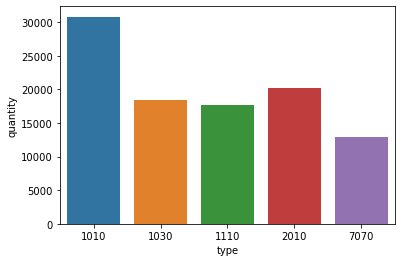

In [8]:
top5_type = df.groupby(['type'])[['client_id']].size().reset_index(name="quantity").sort_values('quantity',ascending=False).head()
sns.barplot(x = top5_type.type, y=top5_type.quantity)
#top5_type

In [9]:
types[types.type.isin(top5_type.type)]

,type,type_description
21,7070,Перевод на карту (с карты) через Мобильный бан...
52,1030,Оплата услуги. Банкоматы
87,2010,Выдача наличных в АТМ
94,1110,Покупка. POS
122,1010,Покупка. POS


<AxesSubplot:xlabel='code', ylabel='quantity'>

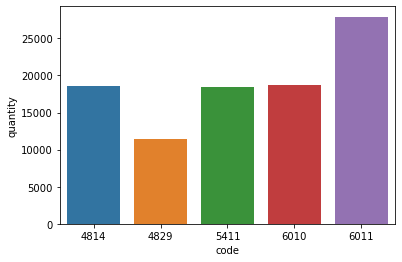

In [10]:
top5_code = df.groupby(['code'])[['client_id']].size().reset_index(name="quantity").sort_values('quantity', ascending=False).head()
sns.barplot(x=top5_code.code, y=top5_code.quantity)

In [11]:
codes[codes.code.isin(top5_code.code)]

,code,code_description
69,6011,Финансовые институты — снятие наличности автом...
77,4814,"Звонки с использованием телефонов, считывающих..."
151,6010,Финансовые институты — снятие наличности вручную
162,4829,Денежные переводы
167,5411,"Бакалейные магазины, супермаркеты"


C:\Users\Ali\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


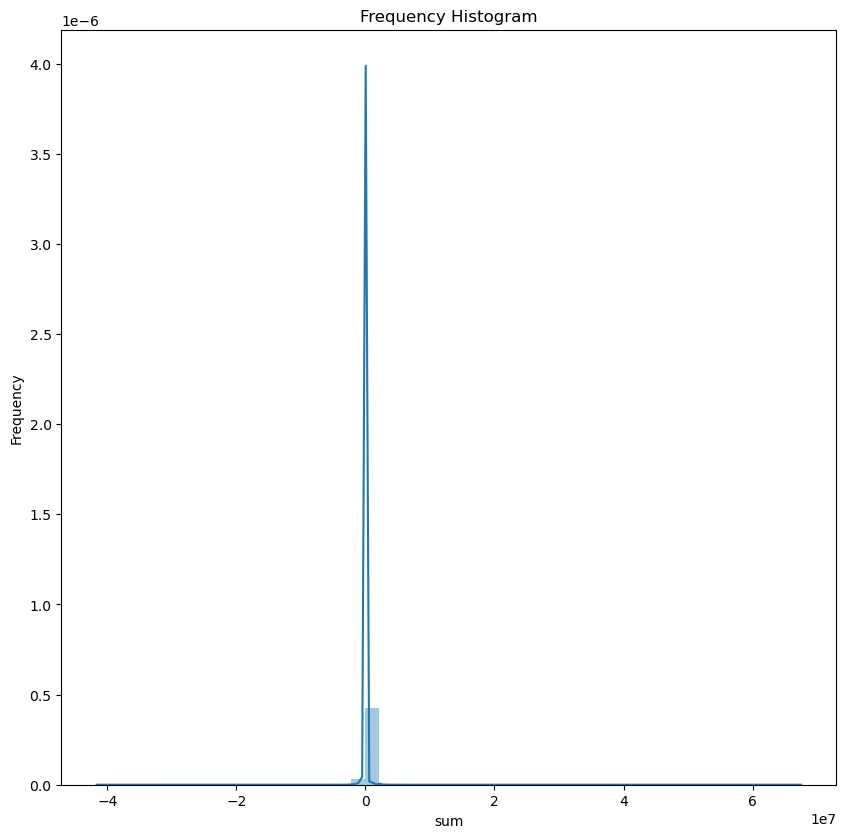

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})

# Plot Histogram on x
x = df['sum']
sns.distplot(x, vertical=False)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

# task 3

In [13]:
df = df[df.type_description!='н/д']

In [14]:
df['t1'] = df.type_description.apply(lambda x: x.split().pop(0))

C:\Users\Ali\AppData\Local\Temp/ipykernel_9900/2680920237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t1'] = df.type_description.apply(lambda x: x.split().pop(0))


In [15]:
df['time1'] = df['datetime'].apply(lambda y: int(y.split().pop(1)[0:2]))

C:\Users\Ali\AppData\Local\Temp/ipykernel_9900/155255514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time1'] = df['datetime'].apply(lambda y: int(y.split().pop(1)[0:2]))


In [16]:
df

,client_id,datetime,code,type,sum,type_description,code_description,t1,time1
0,96372458,421 06:33:15,6011,2010,-561478.94000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,6
1,21717441,55 13:38:47,6011,2010,-44918.32000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,13
2,14331004,263 12:57:08,6011,2010,-3368873.66000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,12
3,2444292,355 09:47:45,6011,2010,-65131.56000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,9
4,2132533,184 20:09:07,6011,2010,-224591.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,20
...,...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71000,Покупка. Зарубеж.,Автобусные линии,Покупка.,0
129994,61978280,401 00:00:00,5169,1200,-271194.78000,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",Покупка.,0
129995,97803699,371 19:47:00,6513,1210,-60792.00000,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,Покупка.,19
129996,63953233,15 00:00:00,4411,1210,-77535.30000,Покупка. POS Зарубеж.,Круизные линии,Покупка.,0


# task4 

In [17]:
train_csv = pd.read_csv('train_set.csv',delimiter=';')
train_csv

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [18]:
df_train = pd.merge(train_csv, df, on='client_id')
df_train

,client_id,target,datetime,code,type,sum,type_description,code_description,t1,time1
0,75063019,0,378 13:01:51,6011,2010,-4491.83000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,13
1,75063019,0,342 14:05:26,6011,2010,-11229.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,14
2,75063019,0,267 17:39:39,6011,2010,-22459.16000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,17
3,75063019,0,236 19:09:34,6011,2010,-11229.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,19
4,75063019,0,389 11:29:04,6011,2010,-4491.83000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,11
...,...,...,...,...,...,...,...,...,...,...
91720,1846496,0,452 00:00:00,5999,1100,-2243.45000,Покупка.,Плавательные бассейны — распродажа,Покупка.,0
91721,1846496,0,228 13:43:45,5732,1010,-13336.70000,Покупка. POS,Продажа электронного оборудования,Покупка.,13
91722,1846496,0,186 13:38:15,5732,1010,-112273.33000,Покупка. POS,Продажа электронного оборудования,Покупка.,13
91723,1846496,0,233 00:00:00,5211,1110,-1122.96000,Покупка. POS,Лесо- и строительный материал,Покупка.,0


In [19]:
new = df_train.drop_duplicates(subset=['client_id'])

In [20]:
new

,client_id,target,datetime,code,type,sum,type_description,code_description,t1,time1
0,75063019,0,378 13:01:51,6011,2010,-4491.83000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,13
29,86227647,1,108 11:05:51,6011,2010,-44918.32000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,11
56,6506523,0,440 16:32:25,6011,2010,-33688.74000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,16
109,50615998,0,221 19:59:26,4814,1030,-6737.75000,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",Оплата,19
116,95213230,0,317 22:12:58,6011,2010,-11229.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,22
...,...,...,...,...,...,...,...,...,...,...
91678,71577803,0,357 10:31:24,5912,1010,-8327.86000,Покупка. POS,Аптеки,Покупка.,10
91683,8128547,1,432 17:10:56,6011,2010,-2245.92000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,17
91690,26055781,0,448 16:29:34,6011,2010,-22459.16000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,16
91696,73504380,1,315 15:01:13,6011,2010,-67377.47000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,15


In [21]:
new_slice = new[:300]
new_slice

,client_id,target,datetime,code,type,sum,type_description,code_description,t1,time1
0,75063019,0,378 13:01:51,6011,2010,-4491.83000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,13
29,86227647,1,108 11:05:51,6011,2010,-44918.32000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,11
56,6506523,0,440 16:32:25,6011,2010,-33688.74000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,16
109,50615998,0,221 19:59:26,4814,1030,-6737.75000,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",Оплата,19
116,95213230,0,317 22:12:58,6011,2010,-11229.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,22
...,...,...,...,...,...,...,...,...,...,...
4744,88877409,0,391 23:11:41,6011,7010,67377.47000,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,Взнос,23
4745,82363585,0,204 10:53:16,6011,2010,-29196.91000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,10
4771,16342382,1,371 14:51:33,6011,2010,-168443.68000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,14
4786,62903374,1,88 10:23:11,6011,2010,-13475.49000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,Выдача,10


In [22]:
new_slice['t1'] = new_slice['t1'].factorize()[0]


C:\Users\Ali\AppData\Local\Temp/ipykernel_9900/3122027962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_slice['t1'] = new_slice['t1'].factorize()[0]


In [23]:
new_slice

,client_id,target,datetime,code,type,sum,type_description,code_description,t1,time1
0,75063019,0,378 13:01:51,6011,2010,-4491.83000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,13
29,86227647,1,108 11:05:51,6011,2010,-44918.32000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,11
56,6506523,0,440 16:32:25,6011,2010,-33688.74000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,16
109,50615998,0,221 19:59:26,4814,1030,-6737.75000,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",1,19
116,95213230,0,317 22:12:58,6011,2010,-11229.58000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,22
...,...,...,...,...,...,...,...,...,...,...
4744,88877409,0,391 23:11:41,6011,7010,67377.47000,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,3,23
4745,82363585,0,204 10:53:16,6011,2010,-29196.91000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,10
4771,16342382,1,371 14:51:33,6011,2010,-168443.68000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,14
4786,62903374,1,88 10:23:11,6011,2010,-13475.49000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,10


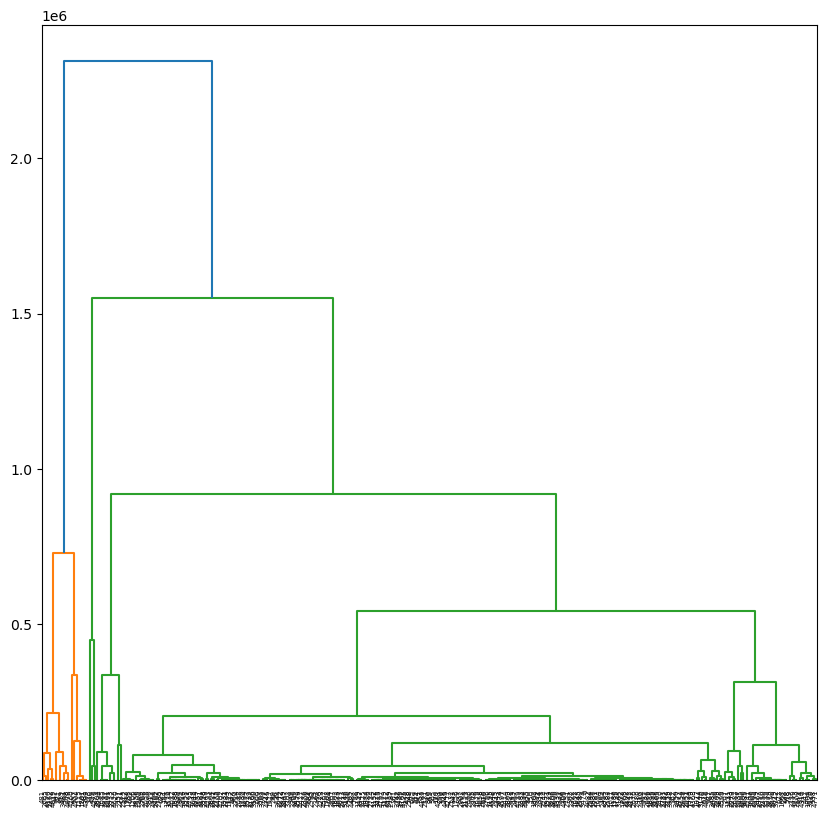

In [24]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(new_slice[['sum', 't1','time1']], method='complete'), labels=new_slice.index)

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(new_slice[['time1', 'sum']])

KMeans(n_clusters=2)

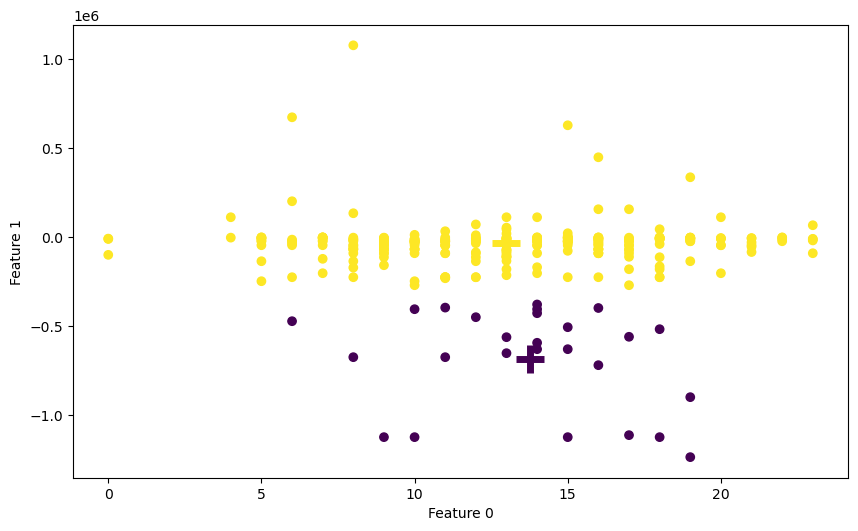

In [26]:
fig = plt.figure(figsize=(10,6))
plt.scatter(new_slice['time1'], new_slice['sum'] , c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1], marker="+", s=400, linewidth=5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [27]:
new_slice[new_slice['sum']==new_slice['sum'].min()]

,client_id,target,datetime,code,type,sum,type_description,code_description,t1,time1
657,94946230,1,110 19:57:34,6011,2010,-1235253.67000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,19


In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(new_slice[['t1', 'sum']])

KMeans(n_clusters=2)

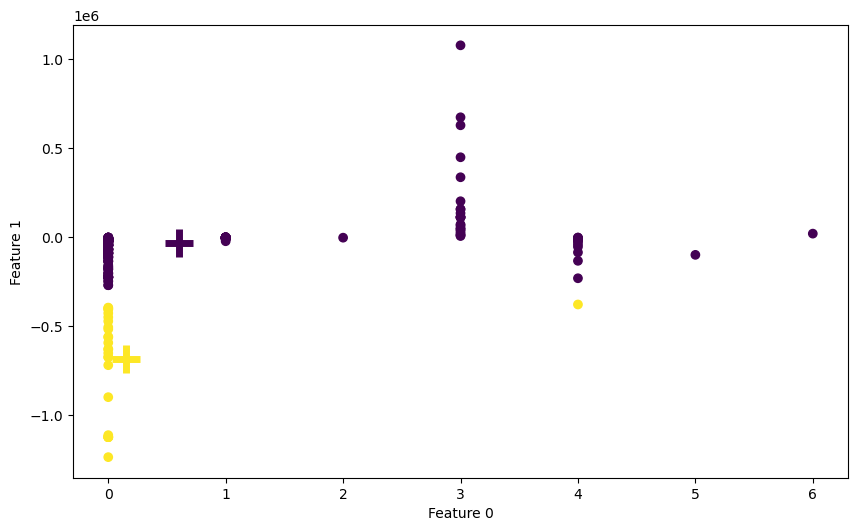

In [30]:
fig = plt.figure(figsize=(10,6))
plt.scatter(new_slice['t1'], new_slice['sum'] , c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1], marker="+", s=400, linewidth=5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# predict

In [31]:
test = pd.read_csv('test_set.csv',delimiter=';')

In [32]:
test

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250
...,...
2651,13491189
2652,54047312
2653,68859452
2654,95721840


In [33]:
pred = pd.merge(test, df, on='client_id')
pred['t1']= pred['t1'].factorize()[0]
pred = pred.drop_duplicates(subset=['client_id'])

In [34]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(pred[['t1', 'sum']])

KMeans(n_clusters=2)

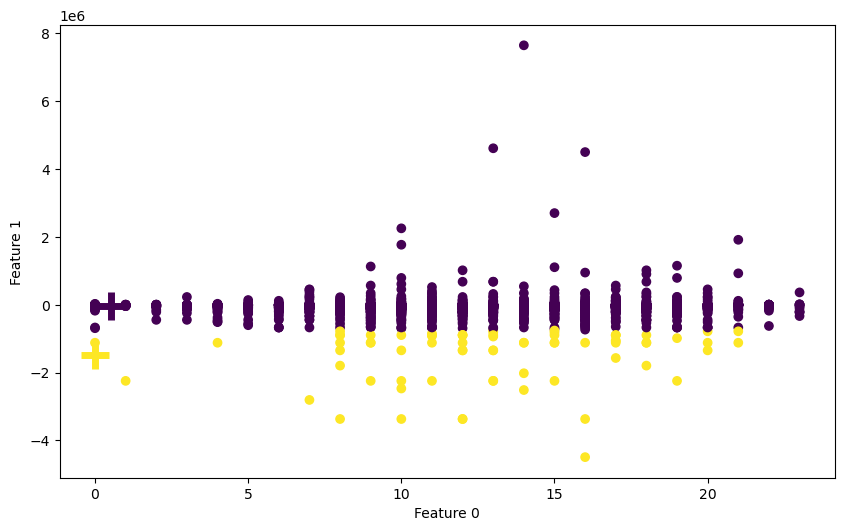

In [35]:
fig = plt.figure(figsize=(10,6))
plt.scatter(pred['time1'], pred['sum'] , c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1], marker="+", s=400, linewidth=5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [36]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
pred = pred.drop_duplicates(subset=['client_id'])

In [38]:
answer = pd.DataFrame()
answer['client_id'] = pred.client_id
answer['gender'] = kmeans.labels_

In [39]:
len(answer[answer['gender']==1])

73

In [40]:
len(answer[answer['gender']==0])

2583

In [41]:
answer

,client_id,gender
0,61240380,0
15,34114030,0
18,15926722,0
21,50598019,0
52,76475250,1
...,...,...
38070,13491189,0
38095,54047312,0
38112,68859452,0
38140,95721840,0


In [42]:
answer[answer['gender']==1]

,client_id,gender
52,76475250,1
329,21871084,1
1130,73635483,1
1315,96571821,1
1425,47056744,1
...,...,...
35307,50185359,1
35360,9712394,1
35948,4707466,1
36009,93245257,1


In [43]:
answer[answer['client_id']==79057931]

,client_id,gender
24432,79057931,1


In [44]:
pred[pred['sum']==pred['sum'].min()]

,client_id,datetime,code,type,sum,type_description,code_description,t1,time1
24432,79057931,413 16:41:38,6011,2010,-4491831.54000,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,16
